In [141]:
# Import libraries
import os
import requests
from zipfile import ZipFile
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [183]:
# Define working directory
os.chdir('/Users/monlopez/Documents/MON/data_bases/covid-19/Mayo')

In [184]:
# Dowload ZipFile of Governmet webpage
# https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico
url = 'http://187.191.75.115/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip'
r = requests.get(url)

with open('/Users/monlopez/Documents/MON/data_bases/covid-19/Mayo/datos_abiertos_covid19.zip', 'wb') as f:
    f.write(r.content)

In [185]:
# UnZip
with ZipFile('datos_abiertos_covid19.zip', 'r') as zipObj:
   # Extraxt zip contents in the working directory  
   zipObj.extractall()

In [186]:
# Import dataset
# The file name will change depending of the day
covid_19 = pd.read_csv("200514COVID19MEXICO.csv", encoding = "ISO-8859-1") 
covid_19.shape

(155932, 35)

In [187]:
covid_19

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-14,03210d,2,4,31,1,31,31,50,1,...,2,1,2,2,99,1,99,MÃ©xico,99,97
1,2020-05-14,0e00d2,2,4,9,1,9,9,16,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
2,2020-05-14,03f822,2,4,9,2,12,23,8,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,2020-05-14,002430,2,4,22,2,22,22,14,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-05-14,0930ff,2,4,9,2,9,15,121,2,...,1,2,2,2,99,1,99,MÃ©xico,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155927,2020-05-14,082616,2,12,9,2,9,9,16,1,...,2,1,2,2,1,3,99,MÃ©xico,99,97
155928,2020-05-14,1ca324,2,12,9,1,9,9,7,1,...,2,2,2,2,1,3,99,MÃ©xico,99,97
155929,2020-05-14,0ef7d9,1,12,15,2,15,15,99,2,...,2,2,2,2,2,3,99,MÃ©xico,99,2
155930,2020-05-14,1b6ef0,2,12,9,1,9,9,17,1,...,2,2,2,2,1,3,99,MÃ©xico,99,97


In [188]:
# SARS-CoV-2
covid_yes = covid_19[covid_19.RESULTADO == 1]
covid_no = covid_19[covid_19.RESULTADO == 2]
covid_ns = covid_19[covid_19.RESULTADO == 3]

In [189]:
covid_si = (covid_yes.groupby(['FECHA_INGRESO'])['RESULTADO'].count()).to_frame()
covid_no = (covid_no.groupby(['FECHA_INGRESO'])['RESULTADO'].count()).to_frame()
covid_ns = (covid_ns.groupby(['FECHA_INGRESO'])['RESULTADO'].count()).to_frame()

In [190]:
# CumSum
covid_si_cum = covid_si.cumsum()[['RESULTADO']]
covid_no_cum = covid_no.cumsum()[['RESULTADO']]
covid_ns_cum = covid_ns.cumsum()[['RESULTADO']]

In [191]:
# Combine by FECHA_INGRESO
merged_left = pd.merge(left=covid_no_cum, right=covid_si_cum, how='left', left_on='FECHA_INGRESO', right_on='FECHA_INGRESO')
merged_left = pd.merge(left=merged_left, right=covid_ns_cum, how='left', left_on='FECHA_INGRESO', right_on='FECHA_INGRESO')

In [192]:
# Rename
merged_left = merged_left.rename(columns={"RESULTADO_x": "Negativo", "RESULTADO_y": "Positivo", "RESULTADO": "Sospechoso"})
merged_left

,Negativo,Positivo,Sospechoso
FECHA_INGRESO,,,
2020-01-01,5,NaN,NaN
2020-01-02,21,NaN,NaN
2020-01-03,39,NaN,NaN
2020-01-04,45,NaN,NaN
2020-01-05,59,NaN,NaN
...,...,...,...
2020-05-10,82877,40267.0,11567.0
2020-05-11,85059,41714.0,14487.0
2020-05-12,86415,42414.0,18734.0


Text(0.5, 1.0, 'Casos acumulados por día')

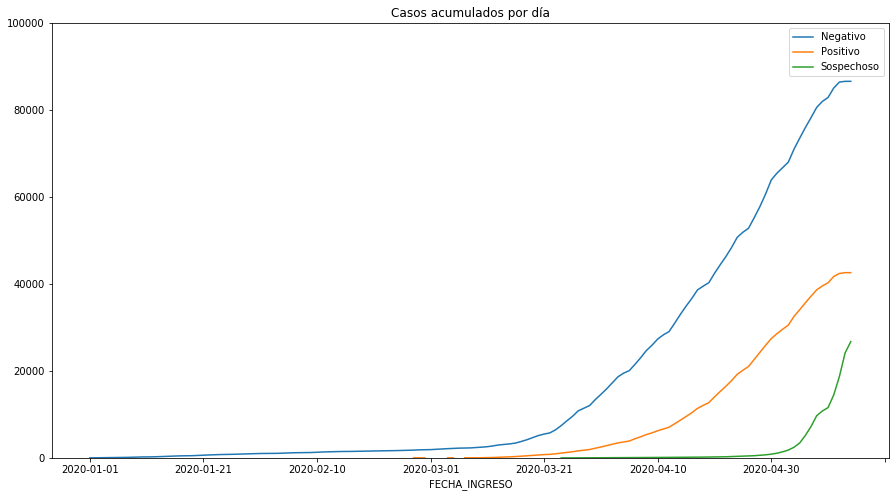

In [193]:
plot1 = merged_left.plot(figsize=(15,8)) 
plot1.set_ylim([0, 100000])
plt.title(f"Casos acumulados por día")

In [194]:
# Grupping by result
resultado = covid_19.groupby('RESULTADO').count()
resultado = resultado[['FECHA_ACTUALIZACION']]
resultado

,FECHA_ACTUALIZACION
RESULTADO,
1,42595
2,86591
3,26746


In [195]:
# Total  
totales = resultado.FECHA_ACTUALIZACION.sum()
totales

155932

In [196]:
# Positive SARS-CoV-2
covid_yes = covid_19[covid_19.RESULTADO == 1]
covid_si = (covid_yes.groupby(['FECHA_INGRESO'])['RESULTADO'].count()).to_frame()
positivos = covid_si.RESULTADO.sum()
positivos

42595

In [197]:
# Negative SARS-CoV-2
covid_no = covid_19[covid_19.RESULTADO == 2]
covid_no = (covid_no.groupby(['FECHA_INGRESO'])['RESULTADO'].count()).to_frame()
negativos = covid_no.RESULTADO.sum()
negativos

86591

In [198]:
# Not confirmed SARS-CoV-2
covid_sosp = covid_19[covid_19.RESULTADO == 3]
covid_sosp = (covid_sosp.groupby(['FECHA_INGRESO'])['RESULTADO'].count()).to_frame()
sospechosos = covid_sosp.RESULTADO.sum()
sospechosos

26746

In [199]:
# Positive (%)
porcentaje_positivos = (positivos/totales) * 100
porcentaje_positivos

27.31639432573173

In [200]:
# Negative (%)
porcentaje_negativos = (negativos / totales) * 100
porcentaje_negativos

55.53125721468333

In [201]:
# Suspicious (%)
porcentaje_sospechosos = (sospechosos / totales) * 100
porcentaje_sospechosos

17.15234845958495

In [202]:
# Positive + Suspicious (%)
porcentaje_positivos + porcentaje_sospechosos

44.46874278531668

<BarContainer object of 3 artists>

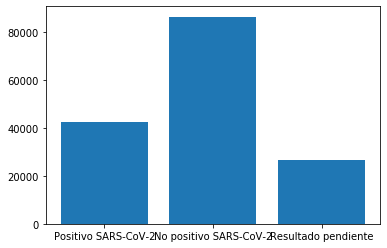

In [203]:
# Plot
n_groups = 3
result = ('Positivo SARS-CoV-2', 'No positivo SARS-CoV-2', 'Resultado pendiente')
casos = (positivos, negativos, sospechosos)
# Create bars
plt.bar(result, casos)

In [204]:
# How many deaths for Covi-19 in México

In [182]:
defun = covid_yes.groupby('FECHA_DEF').size()
defun

FECHA_DEF
2020-03-18        2
2020-03-20        1
2020-03-22        1
2020-03-23        1
2020-03-24        2
2020-03-25        2
2020-03-26        8
2020-03-27        6
2020-03-28       13
2020-03-29        8
2020-03-30       12
2020-03-31       21
2020-04-01       19
2020-04-02       25
2020-04-03       31
2020-04-04       30
2020-04-05       27
2020-04-06       53
2020-04-07       54
2020-04-08       45
2020-04-09       50
2020-04-10       60
2020-04-11       62
2020-04-12       62
2020-04-13       68
2020-04-14       77
2020-04-15       83
2020-04-16       69
2020-04-17       89
2020-04-18       92
2020-04-19      109
2020-04-20      117
2020-04-21      118
2020-04-22      125
2020-04-23      125
2020-04-24      149
2020-04-25      155
2020-04-26      158
2020-04-27      147
2020-04-28      123
2020-04-29      167
2020-04-30      161
2020-05-01      172
2020-05-02      171
2020-05-03      153
2020-05-04      168
2020-05-05      158
2020-05-06      150
2020-05-07      125
2020-05-08

In [205]:
# Delete NA cases
defun = defun[defun != 38118]

In [206]:
# Comulative
cum_death = defun.cumsum()

In [207]:
cum_death

FECHA_DEF
2020-03-18       2
2020-03-20       3
2020-03-22       4
2020-03-23       5
2020-03-24       7
2020-03-25       9
2020-03-26      17
2020-03-27      23
2020-03-28      36
2020-03-29      44
2020-03-30      56
2020-03-31      77
2020-04-01      96
2020-04-02     121
2020-04-03     152
2020-04-04     182
2020-04-05     209
2020-04-06     262
2020-04-07     316
2020-04-08     361
2020-04-09     411
2020-04-10     471
2020-04-11     533
2020-04-12     595
2020-04-13     663
2020-04-14     740
2020-04-15     823
2020-04-16     892
2020-04-17     981
2020-04-18    1073
2020-04-19    1182
2020-04-20    1299
2020-04-21    1417
2020-04-22    1542
2020-04-23    1667
2020-04-24    1816
2020-04-25    1971
2020-04-26    2129
2020-04-27    2276
2020-04-28    2399
2020-04-29    2566
2020-04-30    2727
2020-05-01    2899
2020-05-02    3070
2020-05-03    3223
2020-05-04    3391
2020-05-05    3549
2020-05-06    3699
2020-05-07    3824
2020-05-08    3968
2020-05-09    4100
2020-05-10    4223
20

Text(0.5, 1.0, 'Muertes por COVID-19')

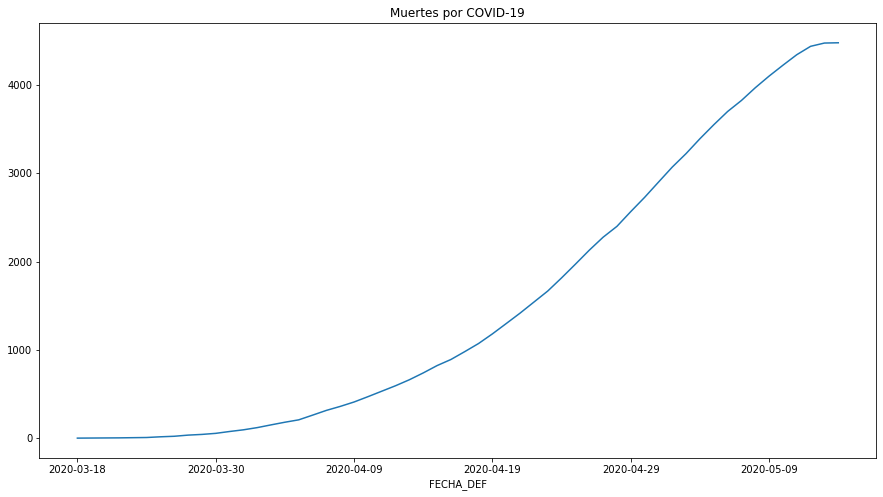

In [208]:
cum_death.plot(figsize=(15,8)) 
plt.title(f"Muertes por COVID-19")